In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv('426 data.csv')
df = df.dropna()
df = df.drop(['Unnamed: 11', 'Featured Streams', 
                '#', 'Last Update'], axis=1)
df = df.replace(',','', regex=True)
df = df.replace('band','group', regex=True)
df = df[~df.debut.str.contains("/")]
df.Lead_Streams = pd.to_numeric(df.Lead_Streams)

df['1b+'] = pd.to_numeric(df['1b+'])
df.debut = pd.to_numeric(df.debut)
df.Tracks = pd.to_numeric(df.Tracks)
df['tracks_per_year'] = df['Tracks'] / (df['debut']/365)
df.debut = df.debut/365
df = df.rename(columns={'debut': 'years_experience', 'min': 'debut'})
df = df.drop(['1b+','100m+','10m+','1m+','debut','Performer','Lead_Streams'], axis=1)
df
# Tracks, years_experience, artist_type, tracks_per_year

,Tracks,years_experience,artist_type,tracks_per_year
0,249,12.517808,solo,19.891661
1,207,9.334247,solo,22.176402
2,141,2.871233,solo,49.107824
3,179,8.298630,solo,21.569825
4,148,9.027397,solo,16.394537
...,...,...,...,...
990,120,25.961644,group,4.622203
991,111,13.323288,solo,8.331277
993,814,53.309589,group,15.269298
997,224,28.147945,solo,7.957952


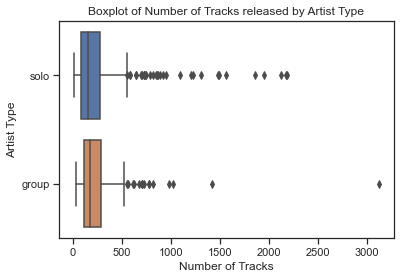

In [87]:
plot1 = sns.boxplot( x=df['Tracks'], y=df["artist_type"])
plot1.set(xlabel='Number of Tracks', ylabel='Artist Type')
plot1.set(title='Boxplot of Number of Tracks released by Artist Type')
plot1.figure.savefig("output1.png")

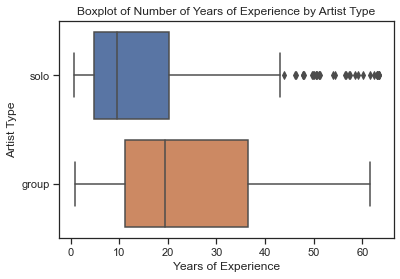

In [83]:
plot2 = sns.boxplot( x=df['years_experience'], y=df["artist_type"])
plot2.set(xlabel='Years of Experience', ylabel='Artist Type')
plot2.set(title='Boxplot of Number of Years of Experience by Artist Type')
plot2.figure.savefig("output2.png")

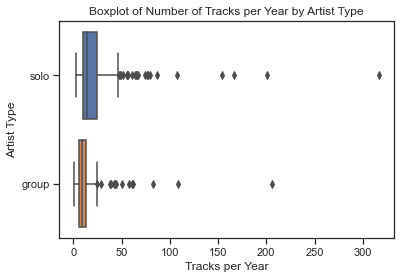

In [84]:
plot3 = sns.boxplot( x=df['tracks_per_year'], y=df["artist_type"])
plot3.set(xlabel='Tracks per Year', ylabel='Artist Type')
plot3.set(title='Boxplot of Number of Tracks per Year by Artist Type')
plot3.figure.savefig("output3.png")

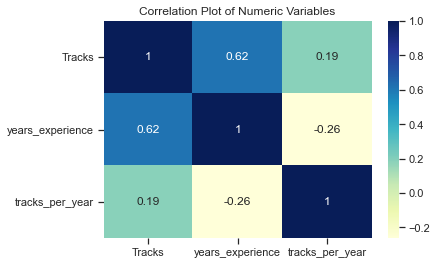

In [90]:
df_plot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True) 
df_plot .set(title='Correlation Plot of Numeric Variables')
df_plot.figure.savefig("output4.png")

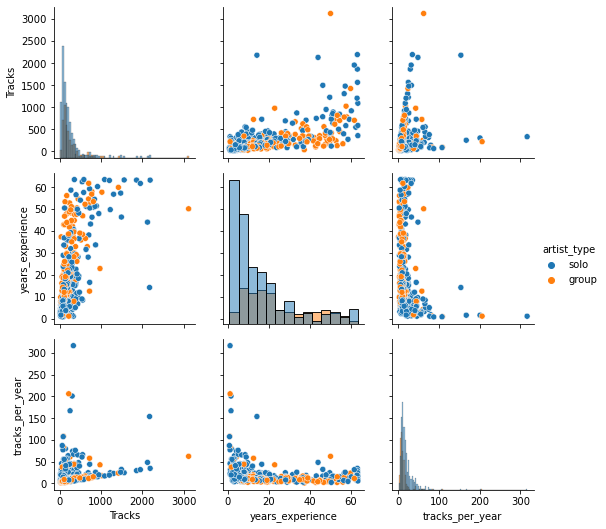

In [51]:
g = sns.PairGrid(df, hue="artist_type")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()